##  Εισαγωγή στα γραφήματα

Αρχικά κατεβάζουμε τα δεδομένα μας από την σιτοσελίδα της Ε.Ε: http://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=une_rt_a&lang=en

(αυτή τη φορά τα κατεβάσαμε ήδη για εσάς)

In [175]:
import pandas as pd
import numpy as np
%matplotlib inline

In [198]:
df = pd.read_csv("EE_unemployment.csv")

In [177]:
df.head()

,TIME,GEO,AGE,UNIT,SEX,Value,Flag and Footnotes
0,2009,European Union - 27 countries (from 2019),Total,Thousand persons,Total,"19,017",NaN
1,2009,European Union - 27 countries (from 2019),Total,Percentage of total population,Total,5.7,NaN
2,2009,European Union - 27 countries (from 2019),Total,Percentage of active population,Total,9.2,NaN
3,2009,European Union - 28 countries,Total,Thousand persons,Total,"21,385",NaN
4,2009,European Union - 28 countries,Total,Percentage of total population,Total,5.6,NaN


In [178]:
df.tail()

,TIME,GEO,AGE,UNIT,SEX,Value,Flag and Footnotes
1195,2018,United States,Total,Percentage of total population,Total,:,NaN
1196,2018,United States,Total,Percentage of active population,Total,3.9,NaN
1197,2018,Japan,Total,Thousand persons,Total,"1,665",NaN
1198,2018,Japan,Total,Percentage of total population,Total,:,NaN
1199,2018,Japan,Total,Percentage of active population,Total,2.4,NaN


<AxesSubplot:>

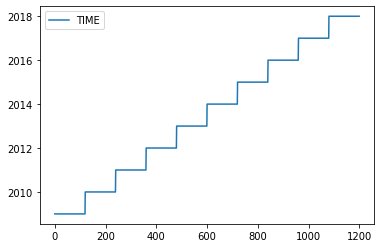

In [179]:
df.plot()

In [199]:
df[41:46]

,TIME,GEO,AGE,UNIT,SEX,Value,Flag and Footnotes
41,2009,Ireland,Total,Percentage of active population,Total,12.6,NaN
42,2009,Greece,Total,Thousand persons,Total,485,NaN
43,2009,Greece,Total,Percentage of total population,Total,5.7,NaN
44,2009,Greece,Total,Percentage of active population,Total,9.6,NaN
45,2009,Spain,Total,Thousand persons,Total,"4,154",NaN


Θα δοκιμάσουμε να υπολογίσουμε το δείκτη ανεργίας, αλλά θα μας βγάλει error!

In [181]:
df.groupby('GEO').Value.mean()  

TypeError: Could not convert 2233.55.32033.24.81943.04.62093.24.92313.65.42453.85.62523.85.72704.16.02483.75.52203.34.9 to numeric

No numeric types to aggregate ???

Ας δούμε τι τύπος είναι τα δεδομένα που προσπαθούμε να επεξεργαστούμε.


In [182]:
df.dtypes

TIME                   int64
GEO                   object
AGE                   object
UNIT                  object
SEX                   object
Value                 object
Flag and Footnotes    object
dtype: object

In [183]:
df.Value.astype(float)

ValueError: could not convert string to float: '19,017'

Ούτε αυτό δουλεύει γιατί όπως βλέπετε δεν υπάρχουν μόνο αριθμοί, αλλά και : στην στήλη αυτή.
    Για να δούμε που είναι αυτό το :

In [184]:
df[df['Value'] == ':']

,TIME,GEO,AGE,UNIT,SEX,Value,Flag and Footnotes
115,2009,United States,Total,Percentage of total population,Total,:,NaN
118,2009,Japan,Total,Percentage of total population,Total,:,NaN
235,2010,United States,Total,Percentage of total population,Total,:,NaN
238,2010,Japan,Total,Percentage of total population,Total,:,NaN
355,2011,United States,Total,Percentage of total population,Total,:,NaN
358,2011,Japan,Total,Percentage of total population,Total,:,NaN
475,2012,United States,Total,Percentage of total population,Total,:,NaN
478,2012,Japan,Total,Percentage of total population,Total,:,NaN
595,2013,United States,Total,Percentage of total population,Total,:,NaN
598,2013,Japan,Total,Percentage of total population,Total,:,NaN


Ας μετατρέψουμε το : σε κάτι που μπορούμε εύκολα να εξαιρέσουμε ή να ξεφορτωθούμε μετά.

In [200]:
df['Value'].replace(':',np.nan, inplace = True)

In [203]:
df.Value.astype(float)

0       19017.0
1           5.7
2           9.2
3       21385.0
4           5.6
         ...   
1195        NaN
1196        3.9
1197     1665.0
1198        NaN
1199        2.4
Name: Value, Length: 1200, dtype: float64

Πρέπει να αλλάξουμε και το κόμμα!

In [202]:
df['Value'] = df['Value'].str.replace(',', '')

In [206]:
df['Value'] = df.Value.astype(float)

In [207]:
df.dtypes

TIME                    int64
GEO                    object
AGE                    object
UNIT                   object
SEX                    object
Value                 float64
Flag and Footnotes     object
dtype: object

## Γραφήματα

Ας φέρουμε ένα ακόμα αρχείο για την ανεργία

In [208]:
df = pd.read_csv("unemployment.csv")

<AxesSubplot:xlabel='country'>

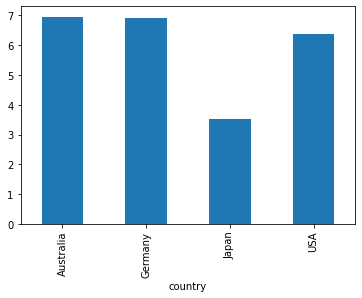

In [209]:
df.groupby('country').unemployment.mean().plot(kind='bar')

<AxesSubplot:xlabel='year'>

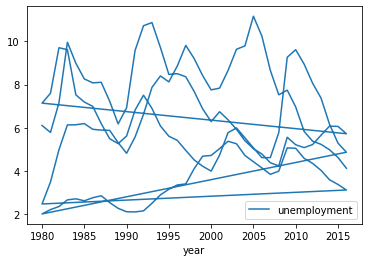

In [210]:
df.plot(x='year', y='unemployment')  

country
Australia    AxesSubplot(0.125,0.125;0.775x0.755)
Germany      AxesSubplot(0.125,0.125;0.775x0.755)
Japan        AxesSubplot(0.125,0.125;0.775x0.755)
USA          AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

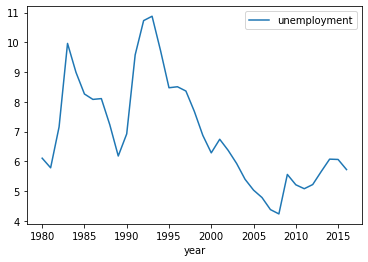

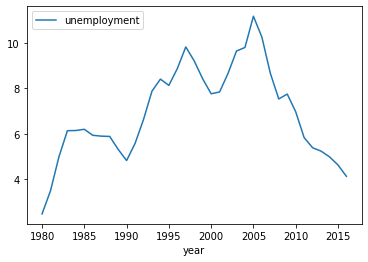

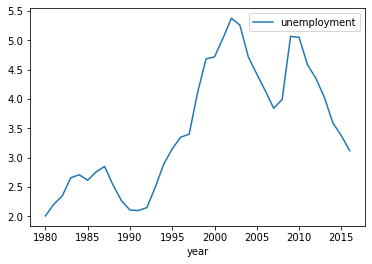

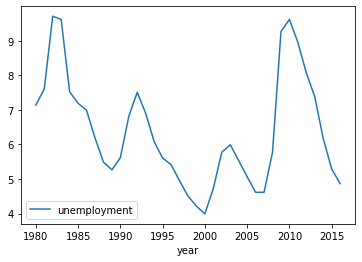

In [211]:
df.groupby('country').plot(x='year', y='unemployment')

country
Australia    AxesSubplot(0.125,0.125;0.775x0.755)
Germany      AxesSubplot(0.125,0.125;0.775x0.755)
Japan        AxesSubplot(0.125,0.125;0.775x0.755)
USA          AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

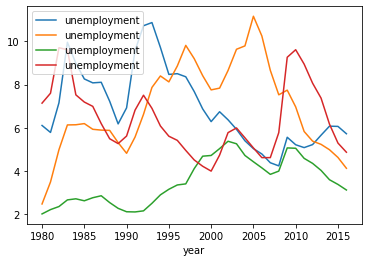

In [212]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

df.groupby('country').plot(x='year', y='unemployment', ax=ax)

country
Australia    AxesSubplot(0.125,0.125;0.775x0.343182)
Germany      AxesSubplot(0.125,0.125;0.775x0.343182)
Japan        AxesSubplot(0.125,0.125;0.775x0.343182)
USA          AxesSubplot(0.125,0.125;0.775x0.343182)
dtype: object

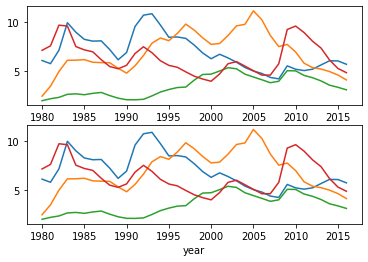

In [213]:

fig = plt.figure() 

ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
df.groupby('country').plot(x='year', y='unemployment', ax=ax, legend=False)
df.groupby('country').plot(x='year', y='unemployment', ax=ax2,legend=False)
#111 means 1x1 grid, give me the 1st one which is the entire 

country
Australia    AxesSubplot(0.547727,0.125;0.352273x0.755)
Germany      AxesSubplot(0.547727,0.125;0.352273x0.755)
Japan        AxesSubplot(0.547727,0.125;0.352273x0.755)
USA          AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

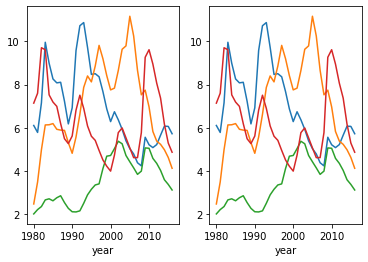

In [214]:

fig = plt.figure() 

ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
df.groupby('country').plot(x='year', y='unemployment', ax=ax, legend=False)
df.groupby('country').plot(x='year', y='unemployment', ax=ax2,legend=False)
#111 means 1x1 grid, give me the 1st one which is the entire 

country
Australia    AxesSubplot(0.547727,0.125;0.352273x0.343182)
Germany      AxesSubplot(0.547727,0.125;0.352273x0.343182)
Japan        AxesSubplot(0.547727,0.125;0.352273x0.343182)
USA          AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

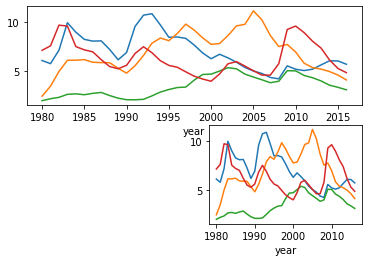

In [215]:
fig = plt.figure() 

ax = fig.add_subplot(211)
ax2 = fig.add_subplot(224)
df.groupby('country').plot(x='year', y='unemployment', ax=ax, legend=False)
df.groupby('country').plot(x='year', y='unemployment', ax=ax2,legend=False)
#111 means 1x1 grid, give me the 1st one which is the entire 

<AxesSubplot:xlabel='year'>

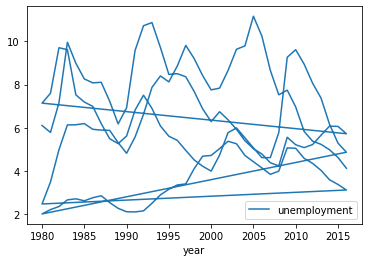

In [216]:
fig, ax = plt.subplots()

df.plot(x='year', y='unemployment', ax=ax)

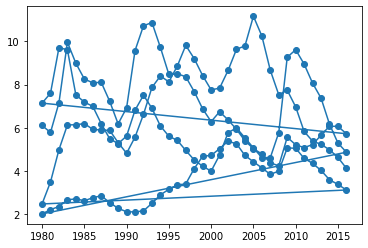

In [217]:
fig, ax = plt.subplots()


#df.plot(x='year', y='unemployment', ax=ax) 
ax.plot(df.year, df.unemployment, marker= 'o', )

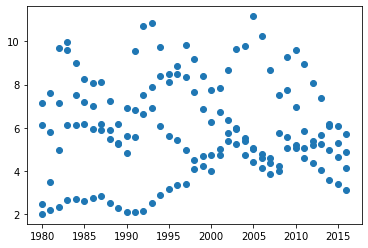

In [218]:
fig, ax = plt.subplots()


#df.plot(x='year', y='unemployment', ax=ax) 
ax.scatter(df.year, df.unemployment, marker= 'o')

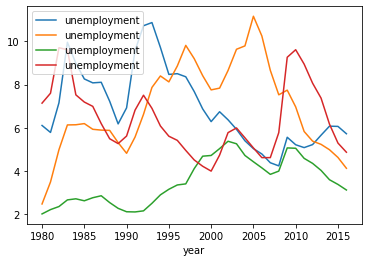

In [219]:
fig, ax = plt.subplots()


for country, group_df in df.groupby('country'):
    group_df.plot(x='year', y='unemployment', ax=ax)
    #ax.plot(group_df['year'], group_df['unemployment'], ax=ax, label=country)
    #print(country)
#.plot(x='year', y='unemployment', ax=ax)

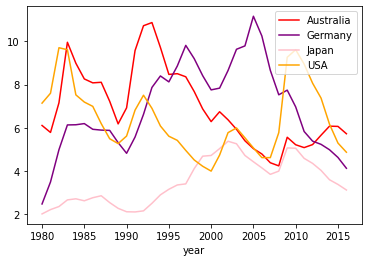

In [220]:
fig, ax = plt.subplots()

colors= {
    
    'Australia': 'red',
    'Germany': 'purple',
    'Japan': 'pink',
    'USA': 'orange'
    
}


for country, group_df in df.groupby('country'):
    line_color = colors[country]
    group_df.plot(x='year', y='unemployment', ax=ax, color=line_color, label=country)
    #ax.plot(group_df['year'], group_df['unemployment'], ax=ax, label=country)
    #print(country)
#.plot(x='year', y='unemployment', ax=ax)